# 01. Data Exploration

This notebook explores the MIT-BIH Arrhythmia Database. We will load raw ECG records, visualize the signals, and examine the annotations.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Add parent directory to path to import src modules
sys.path.append(os.path.abspath('..'))

from src.data_loader import MITBIHDataLoader

## Load Data

In [2]:
data_dir = "../data/raw"
loader = MITBIHDataLoader(data_dir)

# Download if not exists
loader.download_data()

records = loader.get_record_list()
print(f"Found {len(records)} records: {records[:5]}...")

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

## Visualize Record 100

Sampling Frequency: 360 Hz
Signal Shape: (650000, 2)
Annotation symbols: {'A', 'N', '+', 'V'}


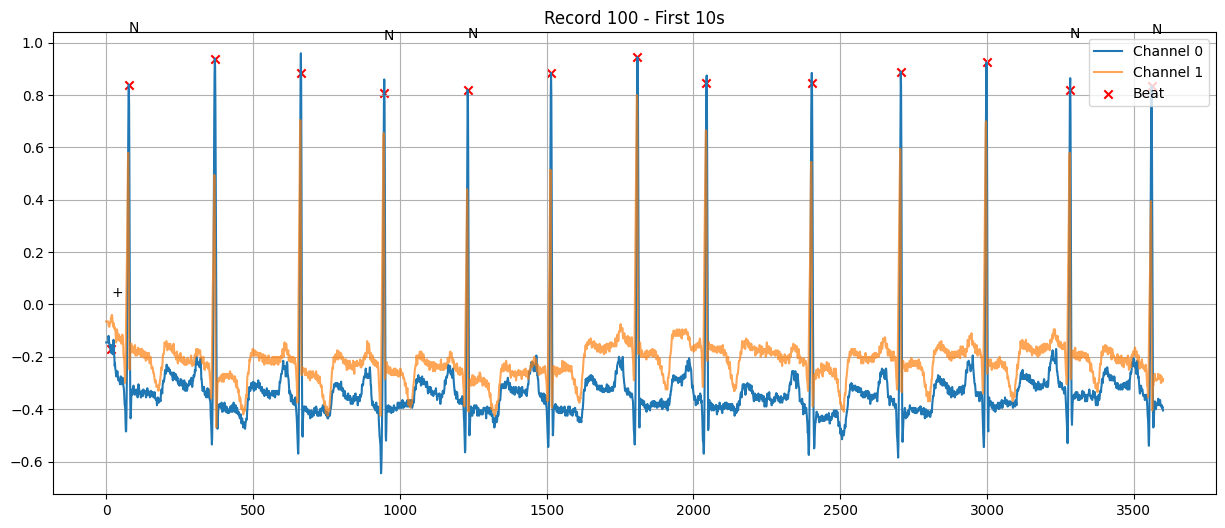

In [3]:
record_id = '100'
signals, fields, annotation = loader.load_record(record_id)

print(f"Sampling Frequency: {fields['fs']} Hz")
print(f"Signal Shape: {signals.shape}")
print(f"Annotation symbols: {set(annotation.symbol)}")

# Plot first 10 seconds (3600 samples)
limit = 3600
plt.figure(figsize=(15, 6))
plt.plot(signals[:limit, 0], label='Channel 0')
plt.plot(signals[:limit, 1], label='Channel 1', alpha=0.7)

# Plot annotations
if annotation:
    ann_indices = annotation.sample[annotation.sample < limit]
    ann_symbols = np.array(annotation.symbol)[:len(ann_indices)]
    
    plt.scatter(ann_indices, signals[ann_indices, 0], c='red', marker='x', label='Beat')
    for idx, sym in zip(ann_indices, ann_symbols):
        plt.annotate(sym, (idx, signals[idx, 0] + 0.2))

plt.title(f"Record {record_id} - First 10s")
plt.legend()
plt.grid(True)
plt.show()